# Understanding Bock and 2PL

This notebook tests the various methods in "irt_models.py" and illustrates 
the response curves for various alternative parameterizations of Samejima and compares them with Bock.

First version: 12/30/2021
This version: 1/3/2023 

In [1]:
import sys
sys.path.append("../")
import numpy as np

from irt_models import (plot_figure,
                        slope_intercept_parameterization,
                        IRT_parameterization,                        
                        normalize_Bock_IRT_parameterization,
                        normalize_Bock_parameterization,
                        Bock_IRT_response, 
                        Bock_normalized_response, 
                        Bock_normalized_IRT_response,
                        TwoPL_response, 
                        transform_Bock_IRT_To_2PL,
                        normalized_Samejima_IRT_response,
                        Samejima_IRT_response,
                        Samejima_response
                        )

## 1: Different parameterizations and normalizations

#### slope-intercept (logistic regression) vs. discrimination-difficulty (IRT)

In [2]:
a = np.array([-6, 1, 2, 3])
b = np.array([-5, 1, 1, 3])
print("Original a, b:")
print(a)
print(b)

alpha, beta = slope_intercept_parameterization(a, b)
print("alpha, beta:")
print(alpha)
print(beta)

a1, b1 = IRT_parameterization(alpha, beta)
print("Recovered a, b:")
print(a1)
print(b1)

Original a, b:
[-6  1  2  3]
[-5  1  1  3]
alpha, beta:
[-6  1  2  3]
[-30  -1  -2  -9]
Recovered a, b:
[-6  1  2  3]
[-5.  1.  1.  3.]


#### Bock normalization (multinomial logistic regression)

In [3]:
a0, b0 = normalize_Bock_IRT_parameterization(a, b)
print("normalized a0, b0:")
print(a0); print(b0)

alpha0, beta0 = normalize_Bock_parameterization(alpha, beta)
print("normalized alpha0, beta0:")
print(alpha0); print(beta0)

alpha01, beta01 = slope_intercept_parameterization(a0, b0)
print("normalized a0 b0 -> transformed into normalized alpha0, beta0 (gives the same result):")
print(alpha01); print(beta01)

normalized a0, b0:
[7 8 9]
[-4.14285714 -3.5        -2.33333333]
normalized alpha0, beta0:
[7 8 9]
[29 28 21]
normalized a0 b0 -> transformed into normalized alpha0, beta0 (gives the same result):
[7 8 9]
[29. 28. 21.]


## 2: Bock IRT response function

#### Comparing various normalized response functions

In [4]:
low = -10
high = 10
num = 3  
theta = np.linspace(low, high, num)
print("Theta:")
print(theta)

a = np.array([-6, 1, 2, 3])
b = np.array([-8, 4, 1, 3])
a0, b0 = normalize_Bock_IRT_parameterization(a, b)
print("normalized a0, b0:"); print(a0); print(b0)
alpha0, beta0 = slope_intercept_parameterization(a0, b0)
print("normalized alpha, beta:"); print(alpha0); print(beta0)

y_bi = Bock_IRT_response(a, b, theta)
y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
y_nb = Bock_normalized_response(alpha0, beta0, theta)

print("\nk * m dimensional matrix, k number of options, m number of students (all 3 variants are identical)")
print(y_nb)
print(y_nbi)
print(y_bi)

Theta:
[-10.   0.  10.]
normalized a0, b0:
[7 8 9]
[-6.28571429 -5.75       -4.33333333]
normalized alpha, beta:
[7 8 9]
[44. 46. 39.]

k * m dimensional matrix, k number of options, m number of students (all 3 variants are identical)
[[1.00000000e+00 9.26789318e-21 9.01385337e-57]
 [5.10908903e-12 1.19107257e-01 2.91394551e-07]
 [1.71390843e-15 8.80090205e-01 4.74258594e-02]
 [7.09547416e-23 8.02538386e-04 9.52573849e-01]]
[[1.00000000e+00 9.26789318e-21 9.01385337e-57]
 [5.10908903e-12 1.19107257e-01 2.91394551e-07]
 [1.71390843e-15 8.80090205e-01 4.74258594e-02]
 [7.09547416e-23 8.02538386e-04 9.52573849e-01]]
[[1.00000000e+00 9.26789318e-21 9.01385337e-57]
 [5.10908903e-12 1.19107257e-01 2.91394551e-07]
 [1.71390843e-15 8.80090205e-01 4.74258594e-02]
 [7.09547416e-23 8.02538386e-04 9.52573849e-01]]


#### Display: Adding more values on x-axis, like equi-spaced students (shows overlapping figures for different normalized methods)

normalized a0, b0:
[7 8 9]
[-6.28571429 -5.75       -4.33333333]


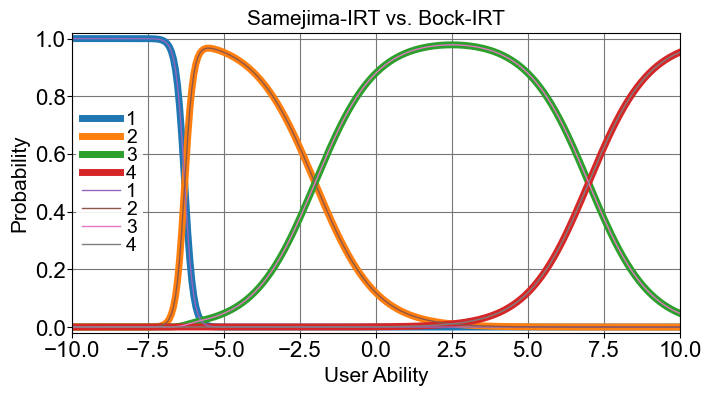

In [5]:
num = 300  
theta = np.linspace(low, high, num)

print("normalized a0, b0:"); print(a0); print(b0)

y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
y_bi = Bock_IRT_response(a, b, theta)

plot_figure(theta, (y_nbi, y_bi), low, high, title =r"Samejima-IRT vs. Bock-IRT",
            label=("1", "2", "3", "4", "1", "2", "3", "4"), linewidth=(5, 5, 5, 5, 1, 1, 1, 1))

## 3: Understanding Bock parameterization

#### When is an intermediate option (according to the total order on the "a" values) never the top choice

normalized a0, b0:
[7 8 9]
[-6.  -6.1 -4. ]


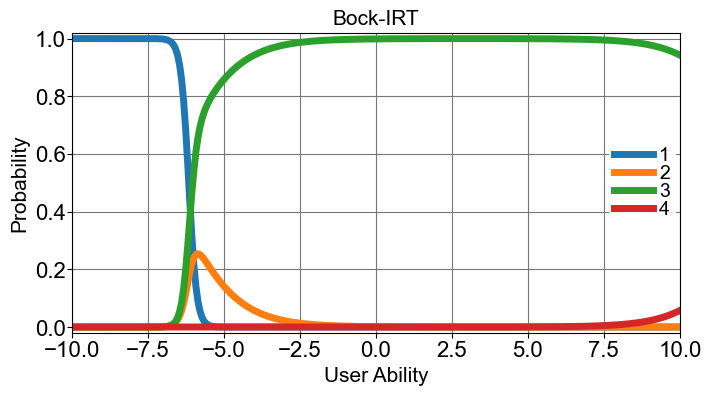

normalized a0, b0:
[7 8 9]
[-6 -6 -4]


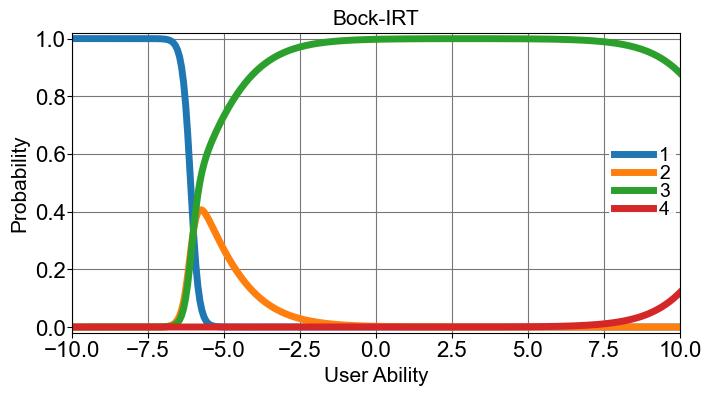

normalized a0, b0:
[7 8 9]
[-6.  -5.9 -4. ]


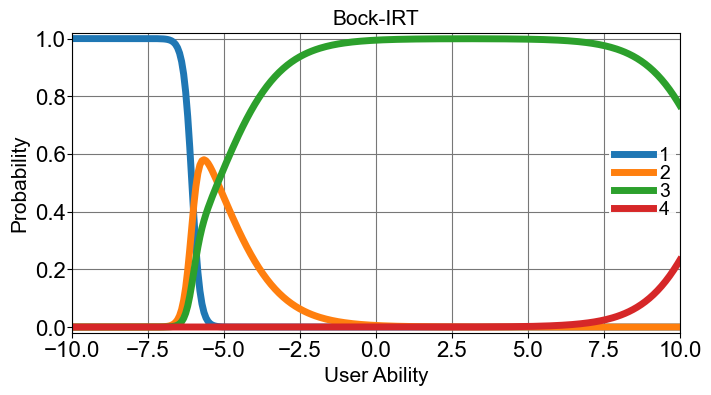

normalized a0, b0:
[7 8 9]
[-6 -5 -4]


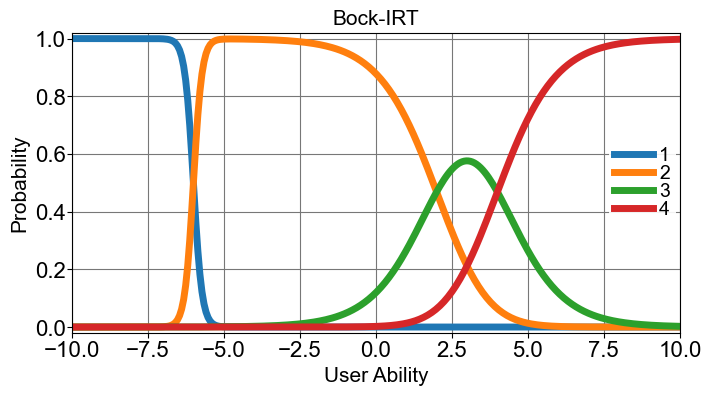

normalized a0, b0:
[7 8 9]
[-6.  -4.5 -4. ]


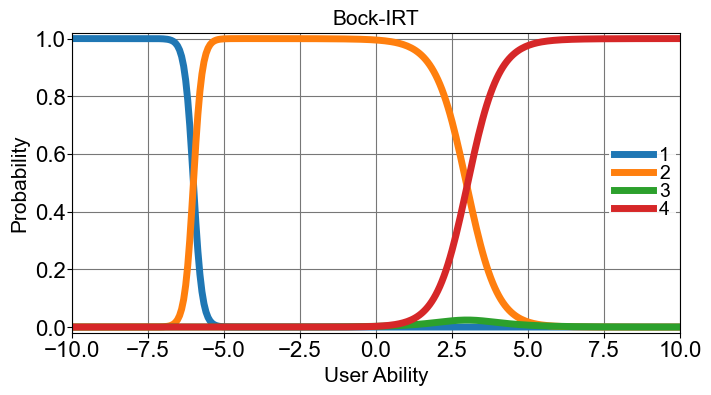

normalized a0, b0:
[7 8 9]
[-6 -3 -4]


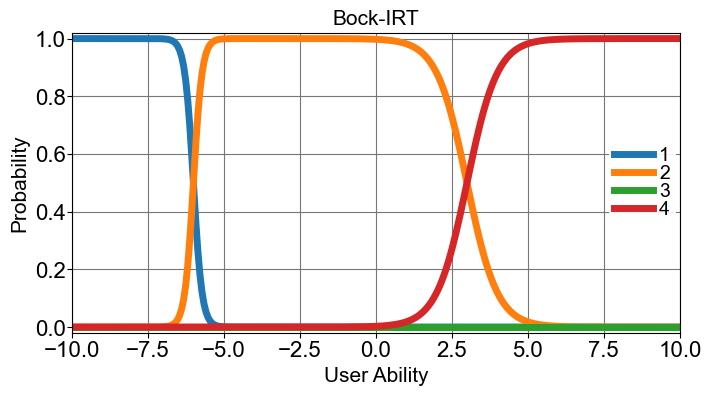

In [6]:
low = -10
high = 10
num = 300  
theta = np.linspace(low, high, num)

a0 = np.array([7, 8, 9])
b0 = np.array([-6, -6.1, -4])
print("normalized a0, b0:"); print(a0); print(b0)
y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
plot_figure(theta, (y_nbi), low, high, title =r"Bock-IRT",
            label=("1", "2", "3", "4"), linewidth=(5, 5, 5, 5))

a0 = np.array([7, 8, 9])
b0 = np.array([-6, -6, -4])
print("normalized a0, b0:"); print(a0); print(b0)
y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
plot_figure(theta, (y_nbi), low, high, title =r"Bock-IRT",
            label=("1", "2", "3", "4"), linewidth=(5, 5, 5, 5))

a0 = np.array([7, 8, 9])
b0 = np.array([-6, -5.9, -4])
print("normalized a0, b0:"); print(a0); print(b0)
y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
plot_figure(theta, (y_nbi), low, high, title =r"Bock-IRT",
            label=("1", "2", "3", "4"), linewidth=(5, 5, 5, 5))

a0 = np.array([7, 8, 9])
b0 = np.array([-6, -5, -4])
print("normalized a0, b0:"); print(a0); print(b0)
y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
plot_figure(theta, (y_nbi), low, high, title =r"Bock-IRT",
            label=("1", "2", "3", "4"), linewidth=(5, 5, 5, 5))

a0 = np.array([7, 8, 9])
b0 = np.array([-6, -4.5, -4])
print("normalized a0, b0:"); print(a0); print(b0)
y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
plot_figure(theta, (y_nbi), low, high, title =r"Bock-IRT",
            label=("1", "2", "3", "4"), linewidth=(5, 5, 5, 5))

b0 = np.array([-6, -3, -4])
print("normalized a0, b0:"); print(a0); print(b0)
y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
plot_figure(theta, (y_nbi), low, high, title =r"Bock-IRT",
            label=("1", "2", "3", "4"), linewidth=(5, 5, 5, 5))

## 4: Bock vs 2PL for k>2

Shows that if the two options with 1st and 2nd highest discrimination values "a" are nicely enough separated from the other options in the Bock model, then there is a reasonable good 2PL approximation of Bock IRT for top option. Otherwise, quickly gets worse

normalized a0, b0:
[7 8 9]
[-6.  -5.5 -4. ]
approximate 2PL parameters:
1 8.0


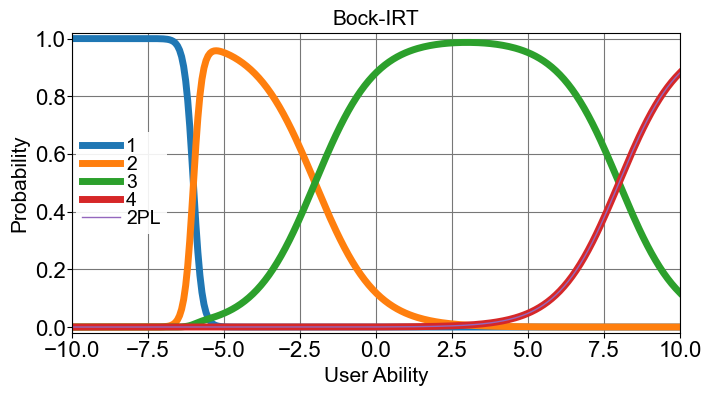

normalized a0, b0:
[7 8 9]
[-6 -5 -4]
approximate 2PL parameters:
1 4.0


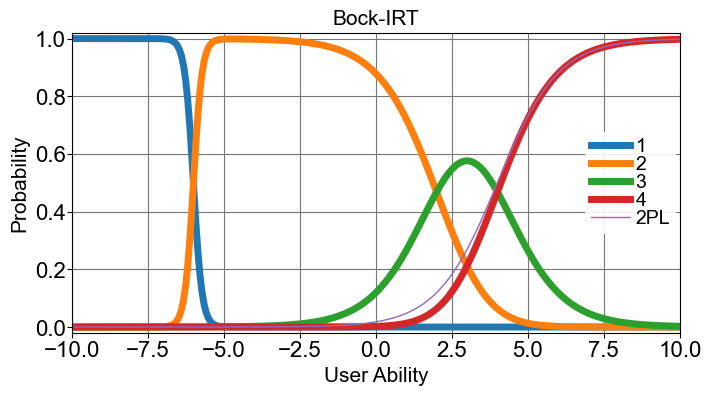

In [7]:
low = -10
high = 10
num = 300  
theta = np.linspace(low, high, num)

# Nicely separated
a0 = np.array([7, 8, 9])
b0 = np.array([-6, -5.5, -4])
print("normalized a0, b0:"); print(a0); print(b0)
y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
a, b = transform_Bock_IRT_To_2PL(a0, b0)
print("approximate 2PL parameters:"); print(a, b)
y_2PL = TwoPL_response(a, b, theta)
plot_figure(theta, (y_nbi, y_2PL), low, high, title =r"Bock-IRT",
            label=("1", "2", "3", "4", "2PL"), linewidth=(5, 5, 5, 5, 1))

# Too close
a0 = np.array([7, 8, 9])
b0 = np.array([-6, -5, -4])
print("normalized a0, b0:"); print(a0); print(b0)
y_nbi = Bock_normalized_IRT_response(a0, b0, theta)
a, b = transform_Bock_IRT_To_2PL(a0, b0)
print("approximate 2PL parameters:"); print(a, b)
y_2PL = TwoPL_response(a, b, theta)
plot_figure(theta, (y_nbi, y_2PL), low, high, title =r"Bock-IRT",
            label=("1", "2", "3", "4", "2PL"), linewidth=(5, 5, 5, 5, 1))

# 5: Bock vs. 2Pl for k=2

Shows that for k=2, 2PL is exactly Bock

a, b:
[-0.5  0.5]
[-2  2]
approximate 2PL parameters:
1.0 0.0


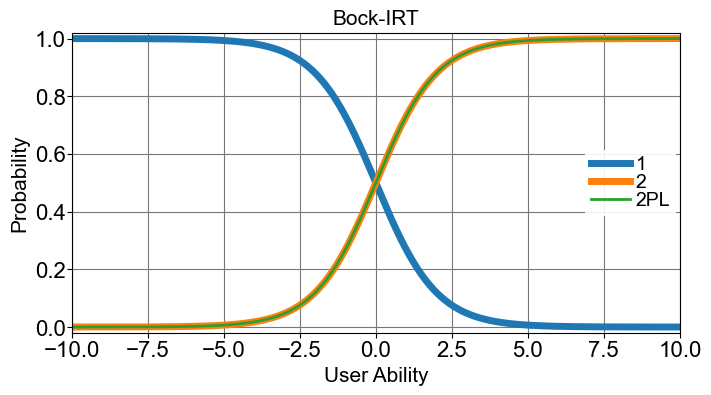

In [8]:
low = -10
high = 10
num = 300  
theta = np.linspace(low, high, num)

a = np.array([-0.5, 0.5])
b = np.array([-2, 2])
print("a, b:"); print(a); print(b)
y_bi = Bock_IRT_response(a, b, theta)
a2PL, b2PL = transform_Bock_IRT_To_2PL(a, b)
print("approximate 2PL parameters:"); print(a2PL, b2PL)
y_2PL = TwoPL_response(a2PL, b2PL, theta)
plot_figure(theta, (y_bi, y_2PL), low, high, title =r"Bock-IRT",
            label=("1", "2", "2PL"), linewidth=(5, 5, 2))

# 6: Samejima IRT response function

#### Different normalizations

In [9]:
a = np.array([-6, 1, 2, 3])
b = np.array([-5, 1, 1, 3])
low = -5
high = 10
num = 3
theta = np.linspace(low, high, num)

alpha, beta = slope_intercept_parameterization(a, b)
a0, b0 = normalize_Bock_IRT_parameterization(a, b)

y_s = Samejima_response(alpha, beta, theta)
y_si = Samejima_IRT_response(a, b, theta)
y_nsi = normalized_Samejima_IRT_response(a0, b0, theta)

print(y_s)
print(y_si)
print(y_nsi)

[[3.34979696e-01 1.80783569e-01 5.85278346e-06]
 [3.32513217e-01 8.10215747e-01 4.74255956e-02]
 [3.32507088e-01 9.00068393e-03 9.52568552e-01]]
[[3.34979696e-01 1.80783569e-01 5.85278346e-06]
 [3.32513217e-01 8.10215747e-01 4.74255956e-02]
 [3.32507088e-01 9.00068393e-03 9.52568552e-01]]
[[3.34979696e-01 1.80783569e-01 5.85278346e-06]
 [3.32513217e-01 8.10215747e-01 4.74255956e-02]
 [3.32507088e-01 9.00068393e-03 9.52568552e-01]]


a, b: [-6  1  2  3] [-5  1  1  3]


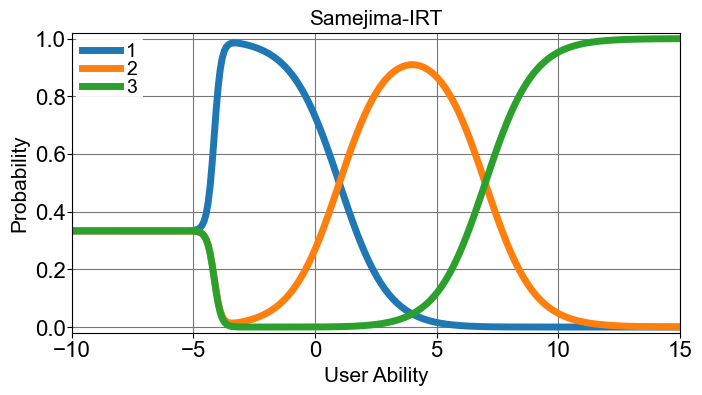

alpha, beta: [-6  1  2  3] [-30  -1  -2  -9]


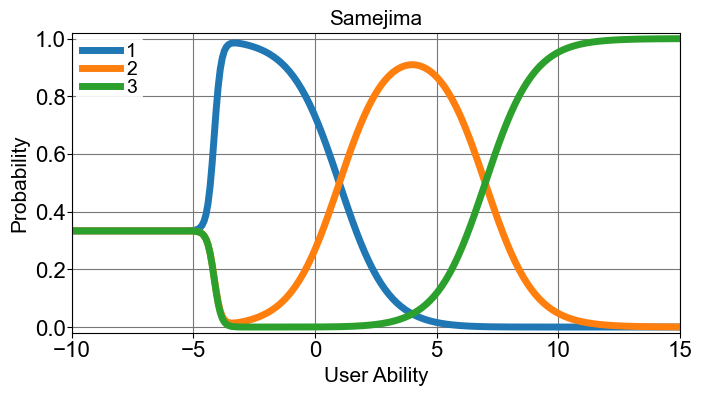

Normalized a0, b0: [7 8 9] [-4.14285714 -3.5        -2.33333333]


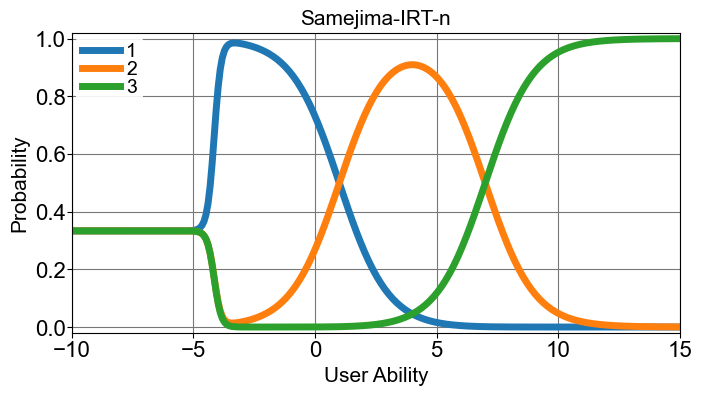

In [10]:
a = np.array([-6, 1, 2, 3])
b = np.array([-5, 1, 1, 3])
low = -10
high = 15
num = 300

theta = np.linspace(low, high, num)
y = Samejima_IRT_response(a, b, theta)
print("a, b:", a, b)
plot_figure(theta, y, low, high, title =r"Samejima-IRT",
            label=("1", "2", "3", "4", "0", "1", "2", "3", "4"),
            linewidth=(5, 5, 5, 5, 5, 2, 2, 2, 2, 2))

alpha, beta = slope_intercept_parameterization(a, b)
y_s = Samejima_response(alpha, beta, theta)
print("alpha, beta:", alpha, beta)
plot_figure(theta, y_s, low, high, title =r"Samejima",
            label=("1", "2", "3", "4", "0", "1", "2", "3", "4"),
            linewidth=(5, 5, 5, 5, 5, 2, 2, 2, 2, 2))

a0, b0 = normalize_Bock_IRT_parameterization(a, b)
y_nsi = normalized_Samejima_IRT_response(a0, b0, theta)
print("Normalized a0, b0:", a0, b0)
plot_figure(theta, y_nsi, low, high, title =r"Samejima-IRT-n",
            label=("1", "2", "3", "4", "0", "1", "2", "3", "4"),
            linewidth=(5, 5, 5, 5, 5, 2, 2, 2, 2, 2))


#### Showing scaling a, b, and theta does not change the responses

a, b: [7 8 9] [-4.  -3.2 -2. ]


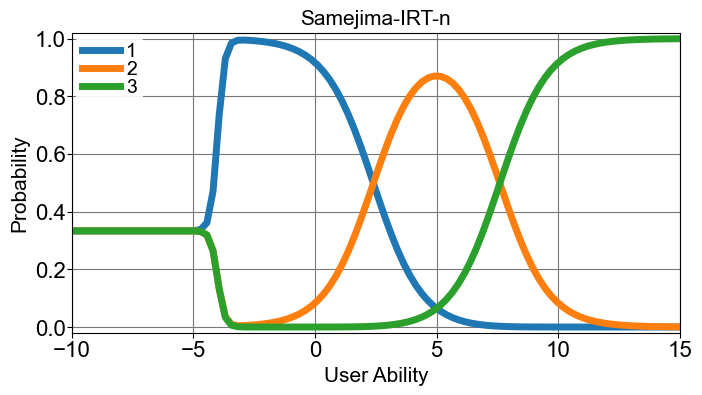

a, b: [70 80 90] [7. 8. 9.]


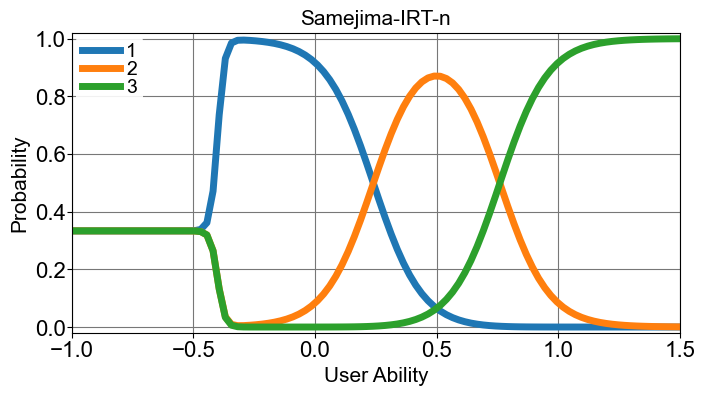

In [11]:
a = np.array([7,8,9])
b = np.array([-4, -3.2, -2])
low = -10
high = 15
num = 100
theta = np.linspace(low, high, num)
y_nsi = normalized_Samejima_IRT_response(a, b, theta)
print("a, b:", a, b)
plot_figure(theta, y_nsi, low, high, title =r"Samejima-IRT-n",
            label=("1", "2", "3", "4", "0", "1", "2", "3", "4"),
            linewidth=(5, 5, 5, 5, 5, 2, 2, 2, 2, 2))

factor = 10
a = a*factor
b = a/factor
low = low/factor
high = high/factor
theta = np.linspace(low, high, num)
print("a, b:", a, b)
plot_figure(theta, y_nsi, low, high, title =r"Samejima-IRT-n",
            label=("1", "2", "3", "4", "0", "1", "2", "3", "4"),
            linewidth=(5, 5, 5, 5, 5, 2, 2, 2, 2, 2))

# 7: Connections between Samejima and Bock

#### The actually most intuitive normalization is to make the slope of the first option to 0. That makes the connection to Bock explicit

a, b: [-3  0  1  2] [-10   0   1   4]


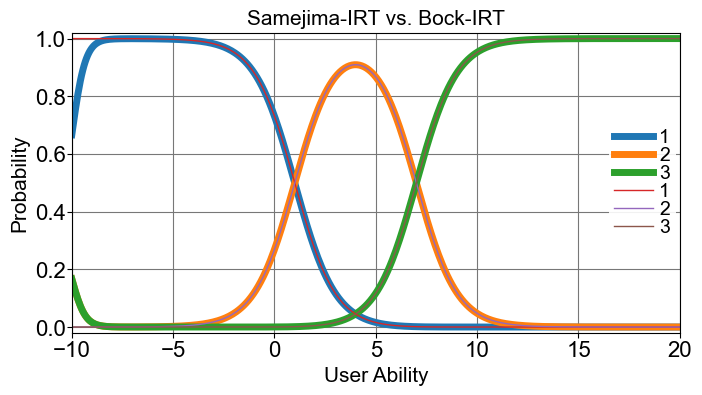

a, b: [-3  0  1  2] [-5  0  1  4]


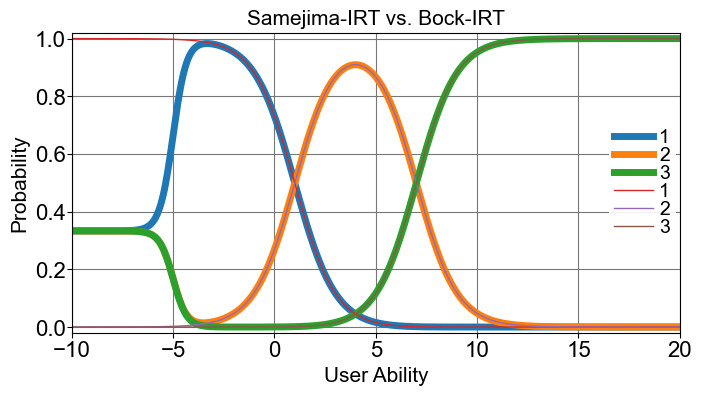

a, b: [-3  0  1  2] [-3  0  1  4]


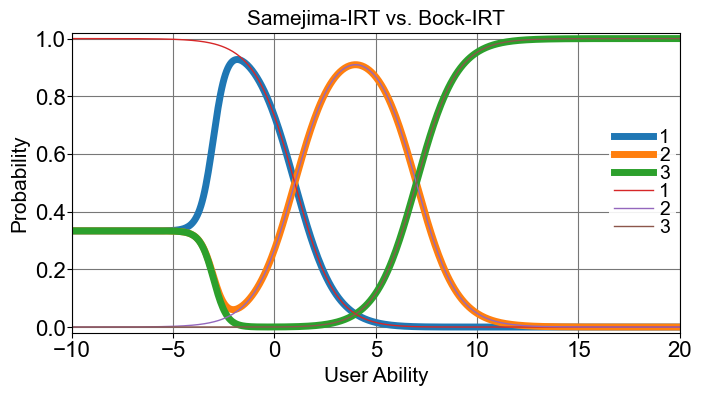

a, b: [-50   0   1   2] [-3  0  1  4]


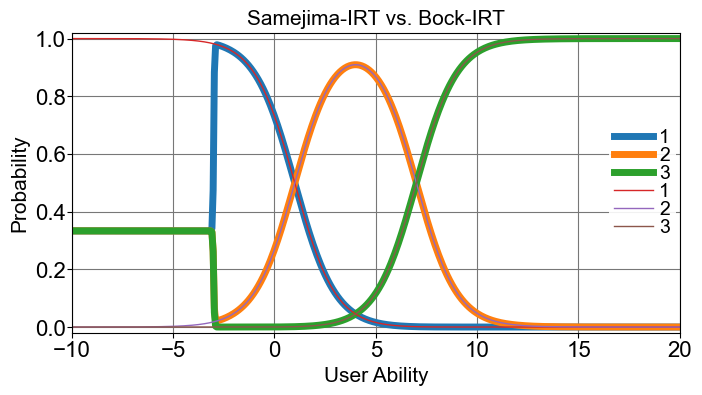

a, b: [-1  0  1  2] [-3  0  1  4]


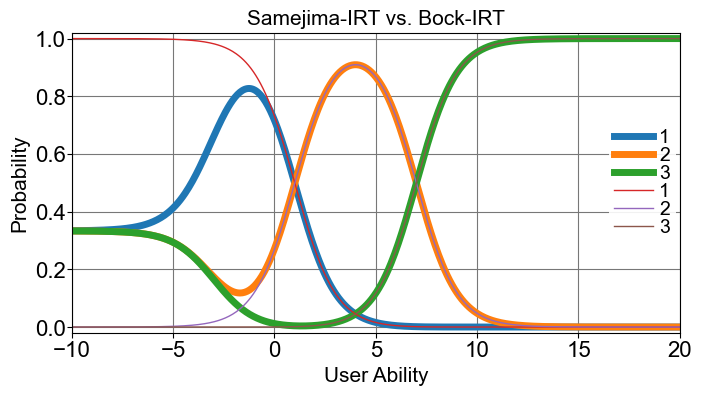

a, b: [-0.2  0.   1.   2. ] [-3  0  1  4]


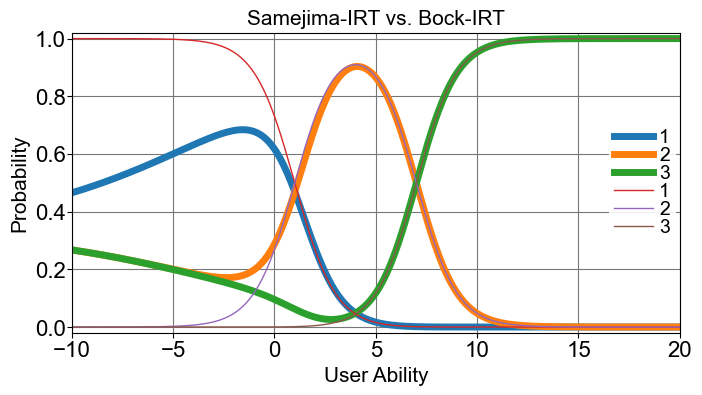

a, b: [-0.2  0.   1.   2. ] [30  0  1  4]


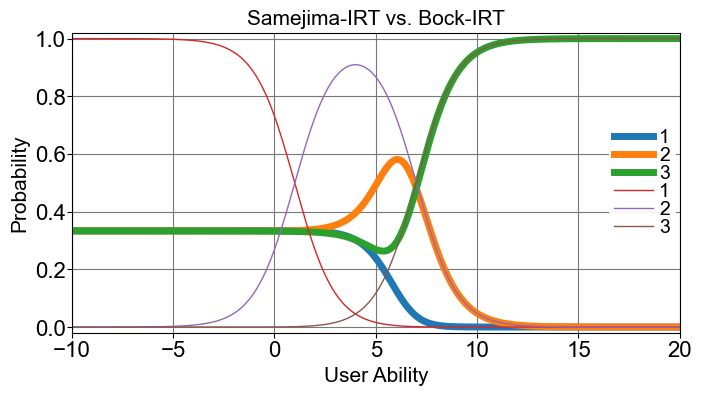

In [12]:
low = -10
high = 20
num = 500
theta = np.linspace(low, high, num)

a = np.array([-3, 0, 1, 2])
b = np.array([-10, 0, 1, 4])
y_si = Samejima_IRT_response(a, b, theta)
print("a, b:", a, b)
a0, b0 = normalize_Bock_IRT_parameterization(a, b)
a2, b2 = normalize_Bock_IRT_parameterization(a0, b0)
y_bi = Bock_normalized_IRT_response(a2, b2, theta)
plot_figure(theta, (y_si, y_bi), low, high, title =r"Samejima-IRT vs. Bock-IRT",
            label=("1", "2", "3", "1", "2", "3"), linewidth=(5, 5, 5, 1, 1, 1))

a = np.array([-3, 0, 1, 2])
b = np.array([-5, 0, 1, 4])
y_si = Samejima_IRT_response(a, b, theta)
print("a, b:", a, b)
a0, b0 = normalize_Bock_IRT_parameterization(a, b)
a2, b2 = normalize_Bock_IRT_parameterization(a0, b0)
y_bi = Bock_normalized_IRT_response(a2, b2, theta)
plot_figure(theta, (y_si, y_bi), low, high, title =r"Samejima-IRT vs. Bock-IRT",
            label=("1", "2", "3", "1", "2", "3"), linewidth=(5, 5, 5, 1, 1, 1))

a = np.array([-3, 0, 1, 2])
b = np.array([-3, 0, 1, 4])
y_si = Samejima_IRT_response(a, b, theta)
print("a, b:", a, b)
a0, b0 = normalize_Bock_IRT_parameterization(a, b)
a2, b2 = normalize_Bock_IRT_parameterization(a0, b0)
y_bi = Bock_normalized_IRT_response(a2, b2, theta)
plot_figure(theta, (y_si, y_bi), low, high, title =r"Samejima-IRT vs. Bock-IRT",
            label=("1", "2", "3", "1", "2", "3"), linewidth=(5, 5, 5, 1, 1, 1))

a = np.array([-50, 0, 1, 2])
b = np.array([-3, 0, 1, 4])
y_si = Samejima_IRT_response(a, b, theta)
print("a, b:", a, b)
a0, b0 = normalize_Bock_IRT_parameterization(a, b)
a2, b2 = normalize_Bock_IRT_parameterization(a0, b0)
y_bi = Bock_normalized_IRT_response(a2, b2, theta)
plot_figure(theta, (y_si, y_bi), low, high, title =r"Samejima-IRT vs. Bock-IRT",
            label=("1", "2", "3", "1", "2", "3"), linewidth=(5, 5, 5, 1, 1, 1))

a = np.array([-1, 0, 1, 2])
b = np.array([-3, 0, 1, 4])
y_si = Samejima_IRT_response(a, b, theta)
print("a, b:", a, b)
a0, b0 = normalize_Bock_IRT_parameterization(a, b)
a2, b2 = normalize_Bock_IRT_parameterization(a0, b0)
y_bi = Bock_normalized_IRT_response(a2, b2, theta)
plot_figure(theta, (y_si, y_bi), low, high, title =r"Samejima-IRT vs. Bock-IRT",
            label=("1", "2", "3", "1", "2", "3"), linewidth=(5, 5, 5, 1, 1, 1))

a = np.array([-0.2, 0, 1, 2])
b = np.array([-3, 0, 1, 4])
y_si = Samejima_IRT_response(a, b, theta)
print("a, b:", a, b)
a0, b0 = normalize_Bock_IRT_parameterization(a, b)
a2, b2 = normalize_Bock_IRT_parameterization(a0, b0)
y_bi = Bock_normalized_IRT_response(a2, b2, theta)
plot_figure(theta, (y_si, y_bi), low, high, title =r"Samejima-IRT vs. Bock-IRT",
            label=("1", "2", "3", "1", "2", "3"), linewidth=(5, 5, 5, 1, 1, 1))

a = np.array([-0.2, 0, 1, 2])
b = np.array([30, 0, 1, 4])
y_si = Samejima_IRT_response(a, b, theta)
print("a, b:", a, b)
a0, b0 = normalize_Bock_IRT_parameterization(a, b)
a2, b2 = normalize_Bock_IRT_parameterization(a0, b0)
y_bi = Bock_normalized_IRT_response(a2, b2, theta)
plot_figure(theta, (y_si, y_bi), low, high, title =r"Samejima-IRT vs. Bock-IRT",
            label=("1", "2", "3", "1", "2", "3"), linewidth=(5, 5, 5, 1, 1, 1))
